In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 165.2 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 203.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? e


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nltk
from nltk.corpus import stopwords
import re

In [6]:
train_data=pd.read_csv("archive/twitter_training.csv")
val_data=pd.read_csv("archive/twitter_validation.csv")

In [7]:
train_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
val_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
train_data.columns=["tweet_id","entity","Sentiment","message"]

In [10]:
train_data

,tweet_id,entity,Sentiment,message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
val_data.columns=["tweet_id","entity","Sentiment","message"]

In [12]:
val_data

,tweet_id,entity,Sentiment,message
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:

data = pd.concat([train_data, val_data], ignore_index=True)

In [14]:
data

,tweet_id,entity,Sentiment,message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
data.shape

(75680, 4)

In [16]:
data.isnull().sum()

tweet_id       0
entity         0
Sentiment      0
message      686
dtype: int64

In [18]:
data.isnull().sum()

tweet_id     0
entity       0
Sentiment    0
message      0
dtype: int64

In [19]:
data["entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [20]:
data["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [21]:
data["Sentiment"].value_counts()

Sentiment
Negative      22624
Positive      20931
Neutral       18393
Irrelevant    13046
Name: count, dtype: int64

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
def preprocess_msg(message):
    if not isinstance(message, str):
        return ''
    text = re.sub(r'http\S+', '', message)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading and trailing whitespace
    tokens = text.split()  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [24]:
data["message"]=train_data["message"].apply(preprocess_msg)


In [25]:
data

,tweet_id,entity,Sentiment,message
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,NaN
75676,4359,CS-GO,Irrelevant,NaN
75677,2652,Borderlands,Positive,NaN
75678,8069,Microsoft,Positive,NaN


In [26]:
data.dropna(inplace=True)

In [27]:
label_encoder=LabelEncoder()
data["Label"]=label_encoder.fit_transform(data["Sentiment"])

In [28]:
data

,tweet_id,entity,Sentiment,message,Label
0,2401,Borderlands,Positive,coming borders kill,3
1,2401,Borderlands,Positive,im getting borderlands kill,3
2,2401,Borderlands,Positive,im coming borderlands murder,3
3,2401,Borderlands,Positive,im getting borderlands murder,3
4,2401,Borderlands,Positive,im getting borderlands murder,3
...,...,...,...,...,...
74676,9200,Nvidia,Positive,realized windows partition mac like years behi...,3
74677,9200,Nvidia,Positive,realized mac window partition years behind nvi...,3
74678,9200,Nvidia,Positive,realized windows partition mac years behind nv...,3
74679,9200,Nvidia,Positive,realized windows partition mac like years behi...,3


In [29]:
x=data.drop(columns=["Label"])
x

,tweet_id,entity,Sentiment,message
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
74676,9200,Nvidia,Positive,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,realized windows partition mac like years behi...


In [30]:
y=data["Label"]
y

0        3
1        3
2        3
3        3
4        3
        ..
74676    3
74677    3
74678    3
74679    3
74680    3
Name: Label, Length: 73995, dtype: int32

In [31]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train=vectorizer.fit_transform(data['message'])
x_test=vectorizer.fit_transform(data['message'])
y_train = data['Label']
y_test = data['Label']

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
y_pred=classifier.predict(x_test)

In [35]:
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9612946820731131


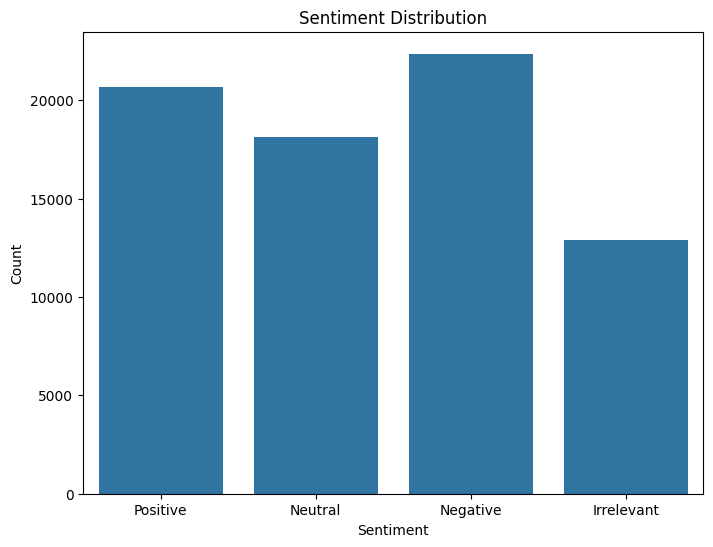

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()      

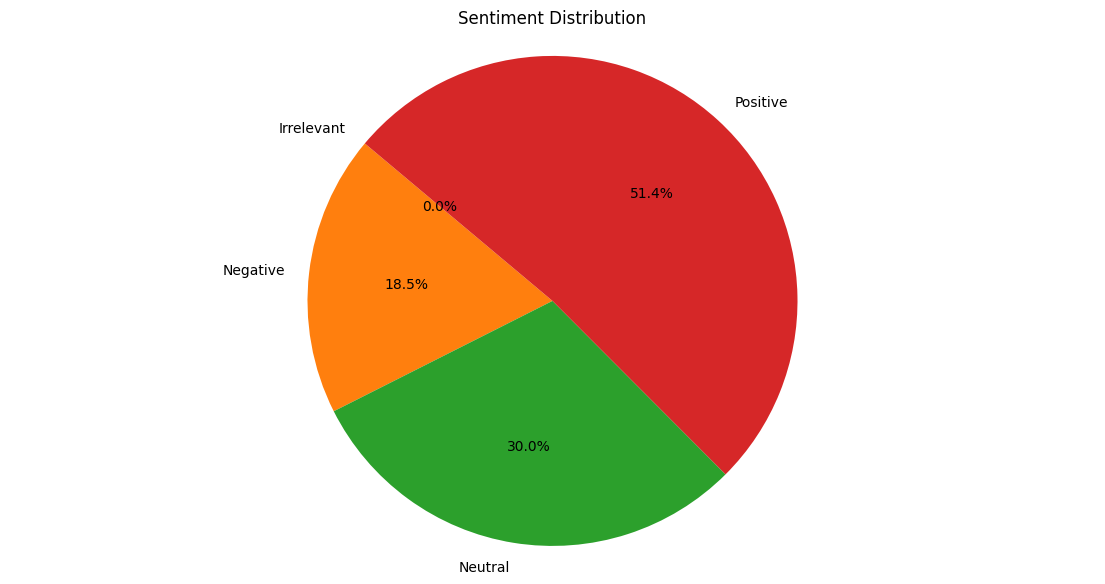

In [42]:
sentiment_counts = data.groupby('Sentiment')['Label'].sum()
plt.figure(figsize=(14, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

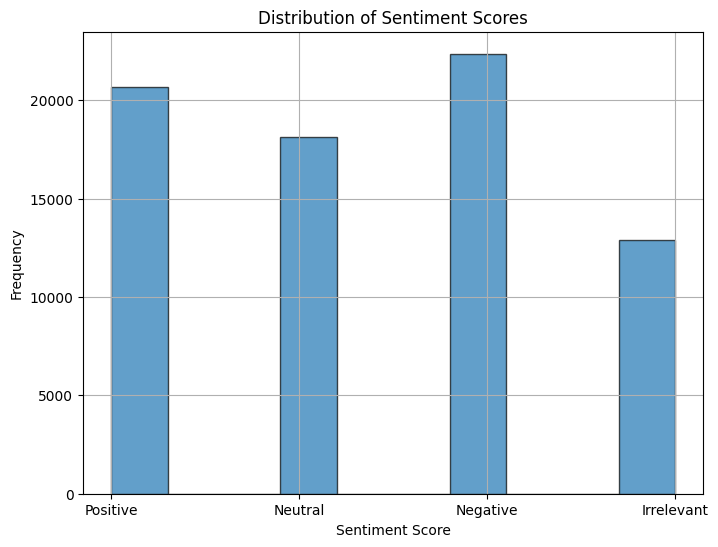

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(data['Sentiment'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()